In [1]:
import logging
logging.root.setLevel(logging.INFO)


In [2]:
import random

from xcs import XCSAlgorithm
from xcs.scenarios import Scenario

In [3]:
import random

from xcs.scenarios import Scenario
from xcs.bitstrings import BitString

# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze
import gym_corridor
import gym_multiplexer


class MazeScenario(Scenario):
    
    def __init__(self, exploration_cycles, exploitation_cycles, input_size=8):
        self.input_size = input_size
        self.maze = gym.make('Maze5-v0')
        self.possible_actions = (0, 1, 2, 3, 4, 5, 6, 7)
        self.done = False
        self.state = None
        self.reward = 0
        self.state = self.maze.reset()
        self.remaining_cycles = exploration_cycles
        self.exploration_cycles = exploration_cycles
        self.exploitation_cycles = exploitation_cycles
        
        self.steps_array = []
        self.steps = 0

    def reset(self):
        self.done = False
        self.state = self.maze.reset()
        return self.state
    
    def switch_to_explitation(self):
        self.remaining_cycles = self.exploitation_cycles
        
    # XCS Hosford42 functions
    @property
    def is_dynamic(self):
        return False
        
    def get_possible_actions(self):
        return self.possible_actions
        
    def more(self):
        if self.done:
            self.reset()
            self.remaining_cycles -= 1
            self.steps_array.append(self.steps)
            self.steps = 0
        return self.remaining_cycles >=0
        
    def sense(self):
        no_reward_state=[]
        for char in self.state:
            if char == '1' or char == '0':
                no_reward_state.append(char)
            else:
                no_reward_state.append('1')
        return BitString(''.join(no_reward_state))
    
    def execute(self, action):
        self.steps += 1
        raw_state, step_reward, done, _ = self.maze.step(action)
        self.state = raw_state
        self.reward = step_reward
        self.done = done
        return self.reward

    # XCS Pyalcs functions
    def step(self, action):
        raw_state, step_reward, done, _ = self.maze.step(action)
        self.state = raw_state
        self.reward = step_reward
        self.done = done
        return raw_state, self.reward, self.done, _

In [4]:
exploration_cycles = 4000
exploitation_cycles = 1000
input_size = 8
logging.root.setLevel(logging.INFO)
scenario = MazeScenario(exploration_cycles, exploitation_cycles, input_size)

In [5]:
import numpy as np
algorithm = XCSAlgorithm()
algorithm.learning_rate = .1
algorithm.error_threshold = .01              # epsilon_0
algorithm.ga_threshold = 25
algorithm.crossover_probability = 0.5
algorithm.mutation_probability = 0.01
algorithm.initial_prediction = float(np.finfo(np.float32).tiny)        # p_I
algorithm.initial_error = float(np.finfo(np.float32).tiny)            # epsilon_I
algorithm.initial_fitness = float(np.finfo(np.float32).tiny)           # F_I
algorithm.wildcard_probability = 0

In [6]:
model = algorithm.new_model(scenario)
model.run(scenario, learn=True)
scenario.switch_to_explitation()
model.algorithm.exploration_probability = 0
model.run(scenario, learn=True)

In [7]:
print(len(model))

167


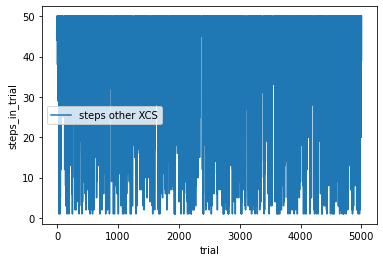

In [8]:
import pandas as pd

df = pd.DataFrame(scenario.steps_array)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps_in_trial")
ax.legend(["steps other XCS"])

In [9]:
from lcs.agents.xcs import Configuration
from utils.xcs_utils import *
                    

cfg = Configuration(number_of_actions=8,
                    max_population=1600,
                    covering_wildcard_chance = 1,
                    metrics_trial_frequency=100,
                    user_metrics_collector_fcn=xcs_metrics)

In [10]:
from lcs.agents.xcs import XCS


agent = XCS(cfg)
my_df = avg_experiment(scenario,
                    cfg,
                    number_of_tests=10,
                    explore_trials=exploration_cycles,
                    exploit_metrics=exploitation_cycles)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [2.5753796832356238e-40, 8.182794531538384e-41, 1.0810461644159025e-40, 1.2409038720890544e-40, 2.0416182765076692e-40, 2.5781862773696704e-40, 1.863423890320942e-40, 3.381523822170563e-40], 'perf_time': 0.013944900000012694, 'population': 64, 'numerosity': 86}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': [43.40812002716842, 36.62148574687448, 19.918272091894387, 30.961666283707764, 26.294299503283142, 34.97845016583823, 27.139365855097275, 34.99095106142033], 'perf_time': 0.0344771000000037, 'population': 288, 'numerosity': 600}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': [23.92824128244944, 31.67656718285148, 40.39424767478592, 32.83140322829606, 42.96129560055051, 47.55054996124562, 53.33903150472863, 46.32525333332016], 'perf_time': 0.034920200000016166, 'population': 288, 'numerosity': 616}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 33, 'reward': [8.964609198676795, 12.748707205874826, 113.36582014156835, 6.606410736932348, 9.72973684670949, 14.043343803477008, 8.189928195110507, 17.86803487918876], 'perf_time': 0.023386500000015076, 'population': 288, 'numerosity': 636}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 11, 'reward': [101.99359403388235, 1.62595248350494

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 18, 'reward': [148.7821564277242, 12.183772774999262, 22.02166179747389, 19.09578811594529, 16.103200023936637, 12.359663159522768, 15.581855891974156, 12.475283625245517], 'perf_time': 0.014388199999984863, 'population': 288, 'numerosity': 672}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 27, 'reward': [51.92914596255588, 6.910703375333236, 105.20989072256039, 7.549739331017126, 7.5332662102988674, 9.65572455748967, 9.128138625230479, 6.363375287985471], 'perf_time': 0.019897599999978866, 'population': 288, 'numerosity': 706}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 50, 'reward': [14.04067833663579, 4.120187084826987, 20.832951734551102, 3.4486873814334413, 2.088923153492256, 4.354208439621413, 3.1506362287239087, 4.392999253569993], 'perf_time': 0.04470149999997375, 'population': 288, 'numerosity': 712}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 46, 'reward': [46.45583485468313, 2.98656443315

Executing 2 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 14, 'reward': [82.53385876992446, 25.44444275872928, 110.46435302751459, 24.345039402973438, 19.911462594540787, 22.28681336936145, 21.280244859526007, 22.636902876455252], 'perf_time': 0.010377699999992274, 'population': 289, 'numerosity': 574}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 7, 'reward': [165.37124797078508, 20.94562133540433, 9.60315978481964, 23.263331799780357, 27.870225048275532, 12.126527956481196, 25.72512027769718, 17.655767309156367], 'perf_time': 0.004862399999979061, 'population': 289, 'numerosity': 592}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 50, 'reward': [20.753736072441747, 36.70435664181244, 29.713694175960715, 47.10988329028581, 28.338703924558253, 38.21643201017832, 35.12364749446656, 37.009330126809225], 'perf_time': 0.03903119999995397, 'population': 289, 'numerosity': 604}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 1, 'reward': [9.361641770146784, 33.70570348

Executing 3 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 13, 'reward': [114.40833832031741, 13.591732334332276, 232.7483340408549, 13.967893667956995, 12.3710288216724, 14.15254927274726, 11.042555470217751, 14.66426108482363], 'perf_time': 0.009385399999985111, 'population': 288, 'numerosity': 662}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 30, 'reward': [165.2083987296346, 8.45216124888181, 15.455754008663217, 8.097218736240054, 8.489499293775122, 11.303176243739042, 12.987060931594398, 8.661661543184033], 'perf_time': 0.02245319999997264, 'population': 288, 'numerosity': 704}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 5, 'reward': [104.263712339172, 1.8875407229118586, 6.270688611738873, 2.676502651757665, 3.21554027305825, 2.8911336032627846, 2.958956624293022, 2.605222830210971], 'perf_time': 0.0033483000000273933, 'population': 288, 'numerosity': 712}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': [12.909767951986165, 7.7089859362858,

Executing 4 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 21, 'reward': [12.500250244486777, 23.926300599306085, 115.71231407776555, 14.571619068689502, 10.745873101046396, 20.460419173971555, 19.597834976397486, 19.634242354582195], 'perf_time': 0.015604299999949944, 'population': 289, 'numerosity': 610}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': [9.796230285930278, 3.5446988613529054, 4.0449314315798, 6.707311046827511, 7.96838050884981, 6.700086836271943, 7.059377012067768, 3.345784138722915], 'perf_time': 0.039028700000017125, 'population': 289, 'numerosity': 628}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 4, 'reward': [228.01872469766437, 4.378191659924787, 12.867498935619135, 7.0885273388121455, 5.836255912743969, 1.9830685466450846, 4.0326530584404985, 6.331228652902203], 'perf_time': 0.0026946000000407366, 'population': 289, 'numerosity': 630}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 36, 'reward': [139.81106602436915, 4.9238591

Executing 5 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 1, 'reward': [239.48124097912665, 8.303692609365777, 207.44319665342886, 8.076357390029676, 9.412296692130274, 8.7165113393159, 11.743073034559846, 6.48682246670147], 'perf_time': 0.0006908000000294123, 'population': 287, 'numerosity': 615}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 8, 'reward': [237.13840039135022, 1.8144205290782898, 12.434591282629768, 1.8714934276744613, 0.9462979982786421, 0.9894965958172806, 1.6999893564108373, 1.4881796377410637], 'perf_time': 0.008068099999945844, 'population': 287, 'numerosity': 625}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 23, 'reward': [69.91840429712435, 2.2088382704377487, 106.23497973158032, 0.8681819660977644, 2.045710261021973, 1.9381203090465617, 1.274606432915384, 2.901666235233447], 'perf_time': 0.016590500000006614, 'population': 287, 'numerosity': 641}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 22, 'reward': [49.26700193756315, 10.0148884

Executing 6 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': [26.046512853332406, 14.012076341852099, 78.1001112930044, 18.263808265198122, 16.73884705575291, 12.200230630575907, 27.17916795488806, 10.156649644660154], 'perf_time': 0.03469329999995807, 'population': 286, 'numerosity': 644}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 17, 'reward': [124.94628963179423, 25.179341883321037, 164.3080239042086, 15.364204221839657, 14.991374377063028, 7.958695944026538, 14.225449375422041, 7.93252818622281], 'perf_time': 0.011245700000017678, 'population': 286, 'numerosity': 648}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 9, 'reward': [207.99123723703613, 0.526060099148593, 24.025265033444555, 1.937923344466106, 2.6237683951617004, 5.859111556625686, 1.120971820306733, 1.2261329993420262], 'perf_time': 0.006828599999948892, 'population': 286, 'numerosity': 648}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 12, 'reward': [97.71065426360842, 10.91124224

Executing 7 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': [75.81282491460455, 15.493725872826117, 58.9762710346383, 27.28302966259444, 33.88944917920006, 35.648271515883074, 26.792992125863943, 25.754837966944407], 'perf_time': 0.03597709999996823, 'population': 288, 'numerosity': 586}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 4, 'reward': [49.44861737071856, 18.676951431816335, 212.10434914601524, 13.271337387515093, 19.788201938845447, 22.195191481607456, 18.914193377067143, 15.816490154560107], 'perf_time': 0.002666099999942162, 'population': 288, 'numerosity': 620}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 50, 'reward': [49.02256409385011, 52.3300057742249, 37.86981203042843, 58.345434327281886, 78.03458712763151, 41.02235368033953, 54.20636424659404, 46.90556510943772], 'perf_time': 0.033588099999974474, 'population': 288, 'numerosity': 642}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': [104.58431177319433, 55.884294653

Executing 8 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': [15.401754332211, 16.873957835402507, 16.17265072104916, 9.021480234835877, 10.17164339807125, 9.526669324194188, 11.299308242867323, 11.899325604418678], 'perf_time': 0.04394369999999981, 'population': 288, 'numerosity': 634}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 9, 'reward': [119.88253023798711, 9.608720871156551, 146.7608366709082, 18.841508248890147, 14.766973772131143, 10.947301279957989, 15.595847308487201, 8.567605501015995], 'perf_time': 0.006011199999989003, 'population': 288, 'numerosity': 640}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 50, 'reward': [12.88506860715386, 15.74719927887814, 31.453698383987447, 28.571910595750104, 28.890746386732005, 30.042181447700777, 25.452777996214405, 12.48897602529778], 'perf_time': 0.03614740000000438, 'population': 288, 'numerosity': 648}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 1, 'reward': [67.30763407283574, 5.927143574496

Executing 9 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 2, 'reward': [260.6668737438434, 10.61800412522798, 217.91069784914066, 10.399074792952312, 17.528992077945084, 8.744113253606635, 11.094438050690941, 7.99398296334776], 'perf_time': 0.0015238000000863394, 'population': 289, 'numerosity': 652}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': [41.68918662534438, 22.09069402675023, 25.675478721078257, 23.913079740514945, 25.409854189122637, 25.457601018932213, 28.642854968654714, 21.597888564897765], 'perf_time': 0.03973040000005312, 'population': 290, 'numerosity': 672}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 42, 'reward': [175.5218778416791, 6.7160797773031895, 37.867213667103556, 5.95827559731411, 3.9081789085153527, 9.231779846993597, 4.117318344929302, 5.611014626983433], 'perf_time': 0.032353600000078586, 'population': 290, 'numerosity': 704}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 3, 'reward': [214.33933944599562, 0.960114045

In [11]:
display(my_df)

,steps_in_trial,perf_time,population,numerosity
trial,,,,
0,50.0,0.016776,88.0,97.4
100,34.1,0.024407,287.9,566.1
200,29.1,0.020955,287.9,602.7
300,25.6,0.018092,287.9,614.9
400,26.9,0.020106,288.0,624.9
500,27.9,0.019871,288.0,633.9
600,33.3,0.024309,288.1,638.9
700,24.8,0.018842,288.1,642.3
800,25.2,0.018888,288.1,645.1


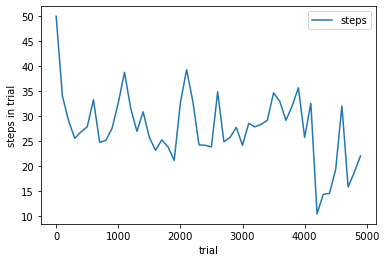

In [12]:
import pandas as pd

ax = my_df['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])


#### Conclusions
Performing 5000 trial test with default values to my implementation, 400